In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
import sys
from models.wrap import inverse_warp
from models.GAN import DPGAN
from models.cor_loss import CORLoss,PhotometricLoss
import torchvision

torch.Size([1, 3, 352, 1216])


/Users/nicklu/opt/anaconda3/envs/DL2023/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/Users/nicklu/opt/anaconda3/envs/DL2023/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 352, 1216])


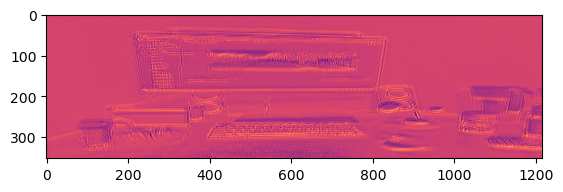

In [2]:
img = Image.open("images/3.jpg")
transform = transforms.Compose([
    transforms.Resize((352,1216)),
    transforms.ToTensor(),
])
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="magma");

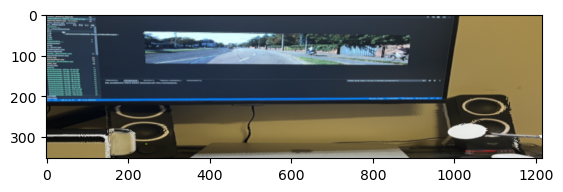

In [3]:
# depth = torch.rand(1,352,1216)/100000000000


# im_frame = Image.open('true_depth.png').convert('L')
# np_frame = (np.array(im_frame).astype(np.double))
# depth = torch.from_numpy(np_frame)
# depth = depth[None,:,:].float()
# print(depth)

pose_left = torch.tensor([[ 0, 0, 100, 0, 0, 0]])
intrinsics = torch.tensor([[721.5377, 0, 596.5593],
                                           [0, 721.5377, 149.854],
                                           [0, 0, 1]])
rep,val,grid = inverse_warp(img, depth, pose_left,intrinsics,rotation_mode='euler', padding_mode='zeros')
rep_0= torch.squeeze(rep[0], dim=0)
plt.imshow(np.transpose(rep_0.detach().numpy(), (1,2,0)));

In [4]:
cor_loss = PhotometricLoss()
cor_loss(img,rep)

/Users/nicklu/Documents/Git/dl_final_project/models/cor_loss.py:68: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1674806923970/work/aten/src/ATen/native/IndexingUtils.h:28.)
  diff = diff[valid_mask]


tensor(0.6249, grad_fn=<MeanBackward0>)

tensor(126.9457, grad_fn=<MeanBackward0>) tensor(0.9009, grad_fn=<StdBackward0>)


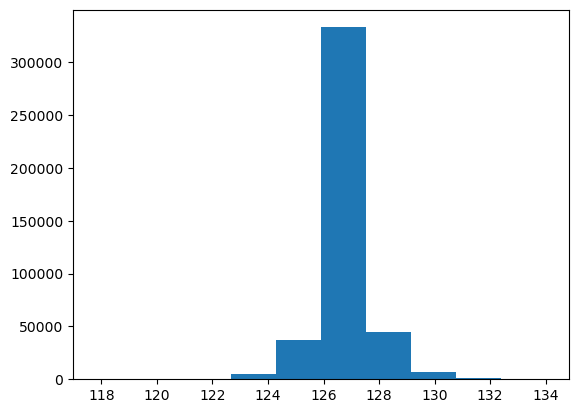

In [5]:
print(depth.mean(), depth.std())
plt.hist(np.ravel(depth.detach().numpy()));

In [6]:
dpgan = DPGAN()
# dpgan.to('cuda')
# dpgan.train(None,5,10)

/Users/nicklu/Documents/Git/dl_final_project/models/generator.py:90: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear1.weight)
/Users/nicklu/Documents/Git/dl_final_project/models/generator.py:92: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear2.weight)
/Users/nicklu/Documents/Git/dl_final_project/models/generator.py:94: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear3.weight)
/Users/nicklu/Documents/Git/dl_final_project/models/generator.py:96: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.linear4.weight)


Training epoch 0 of 500
x6 tensor([[-0.5444,  0.0495,  1.0636,  3.1416, -1.2568, -1.0174]],
       grad_fn=<CopySlices>)
x6 tensor([[-0.6416,  3.1416,  1.8199,  2.7819,  0.8102,  3.0201]],
       grad_fn=<CopySlices>)
x6 tensor([[-0.5444,  0.0495,  1.0636,  3.1416, -1.2568, -1.0174]],
       grad_fn=<CopySlices>)
x6 tensor([[-0.6416,  3.1416,  1.8199,  2.7819,  0.8102,  3.0201]],
       grad_fn=<CopySlices>)


/Users/nicklu/opt/anaconda3/envs/DL2023/lib/python3.8/site-packages/torch/autograd/__init__.py:197: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1674806923970/work/aten/src/ATen/native/IndexingUtils.h:28.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


x6 tensor([[ 3.1416, -3.1416,  1.6705, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -1.0094,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416,  3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416,  3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416, -3.1416,  3.1416, -3.1416, -3.1416, -3.1416]],
       grad_fn=<CopySlices>)
x6 tensor([[ 3.1416,  3.1416, 

KeyboardInterrupt: 

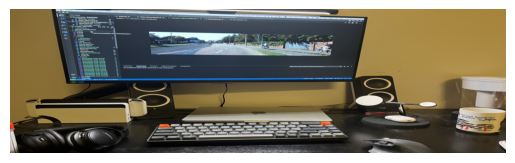

In [7]:
dpgan.train_model(None,1,500)